In [1]:
from zipfile import ZipFile
from osfclient.utils import makedirs
from osfclient import OSF
import numpy as np
import os

from matplotlib import pyplot as plt
import cortex

In [2]:
# link to HCP 7T Retinotopy dataset 
osf = OSF()
project = osf.project('bw9ec')
store = next(project.storages)

In [3]:
## download receptive field model results from OSF

zip_fname = 'prfresultsmgz.zip'

for osf_file in store.files:
    fpath = osf_file.path
    if zip_fname in fpath: # download zip file to working directory 
        with open(zip_fname, 'wb') as f:
            osf_file.write_to(f)

with ZipFile(zip_fname, 'r') as zip_archive:
    zip_archive.extractall('.')

100%|██████████████████████████████████| 2.25G/2.25G [00:39<00:00, 57.1Mbytes/s]


In [4]:
lh_fpath = os.path.join(
    zip_fname.replace('.zip', ''), 
    '999999', # the 'group average' subject
    'lh.fit1_ecc.mgz' # eccentricity, fit1 == full dataset
)
rh_fpath = lh_fpath.replace('lh', 'rh')
assert(os.path.exists(lh_fpath))
assert(os.path.exists(rh_fpath))

In [5]:
from nilearn.surface import load_surf_data
# load eccentricity on fsaverage surface 
ecc_lh = load_surf_data(lh_fpath)
ecc_rh = load_surf_data(rh_fpath)
ecc = np.concatenate([ecc_lh, ecc_rh])
# and r2 for the receptive field model 
r2_lh = load_surf_data(lh_fpath.replace('ecc', 'R2'))
r2_rh = load_surf_data(rh_fpath.replace('ecc', 'R2'))
r2 = np.concatenate([r2_lh, r2_rh])

Gtk-Message: 11:30:18.106: Failed to load module "canberra-gtk-module"


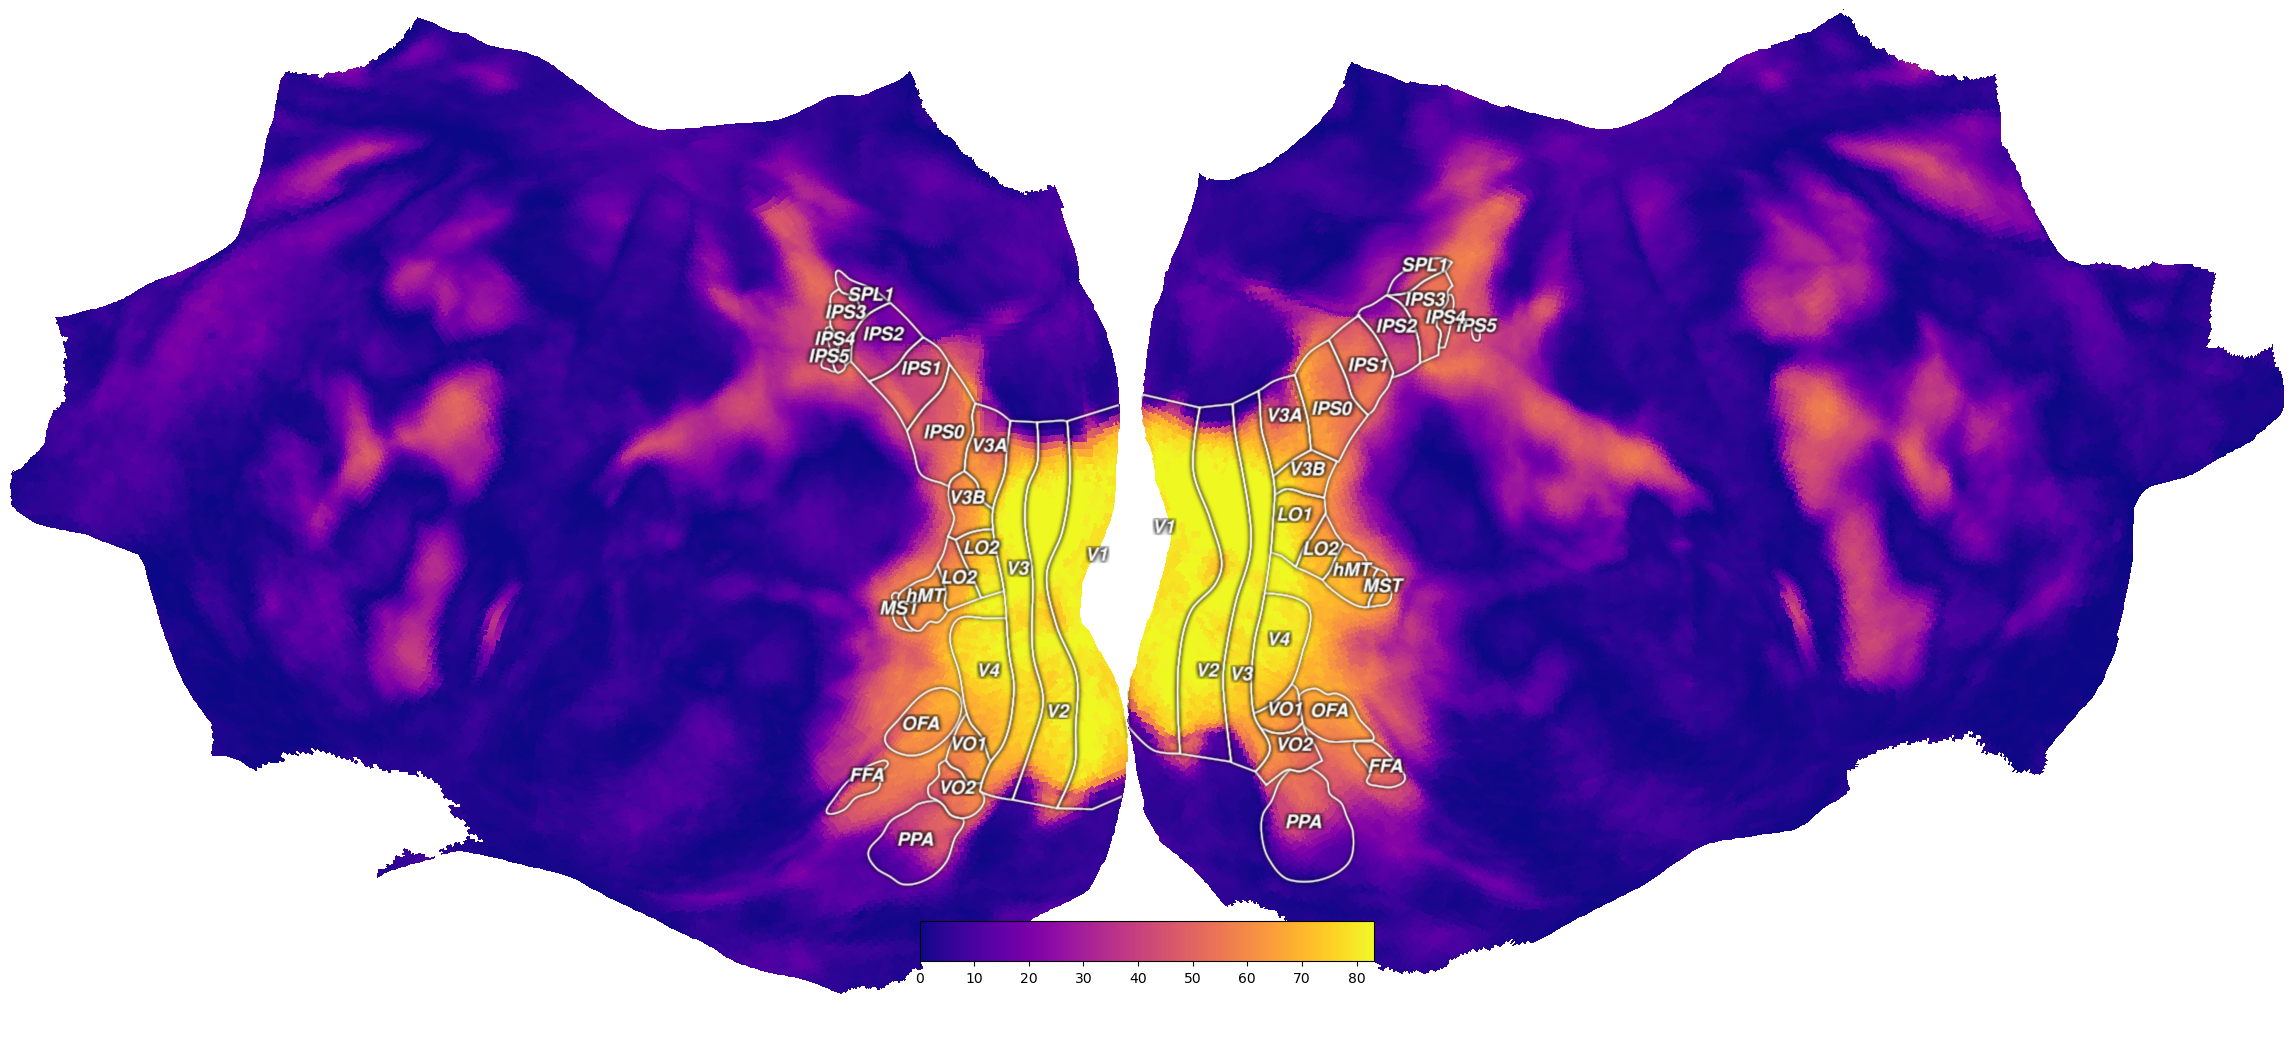

In [6]:
vertex = cortex.Vertex(r2, 'fsaverage', cmap = 'plasma')
fig = cortex.quickshow(vertex)
plt.show()

Gtk-Message: 11:32:39.165: Failed to load module "canberra-gtk-module"


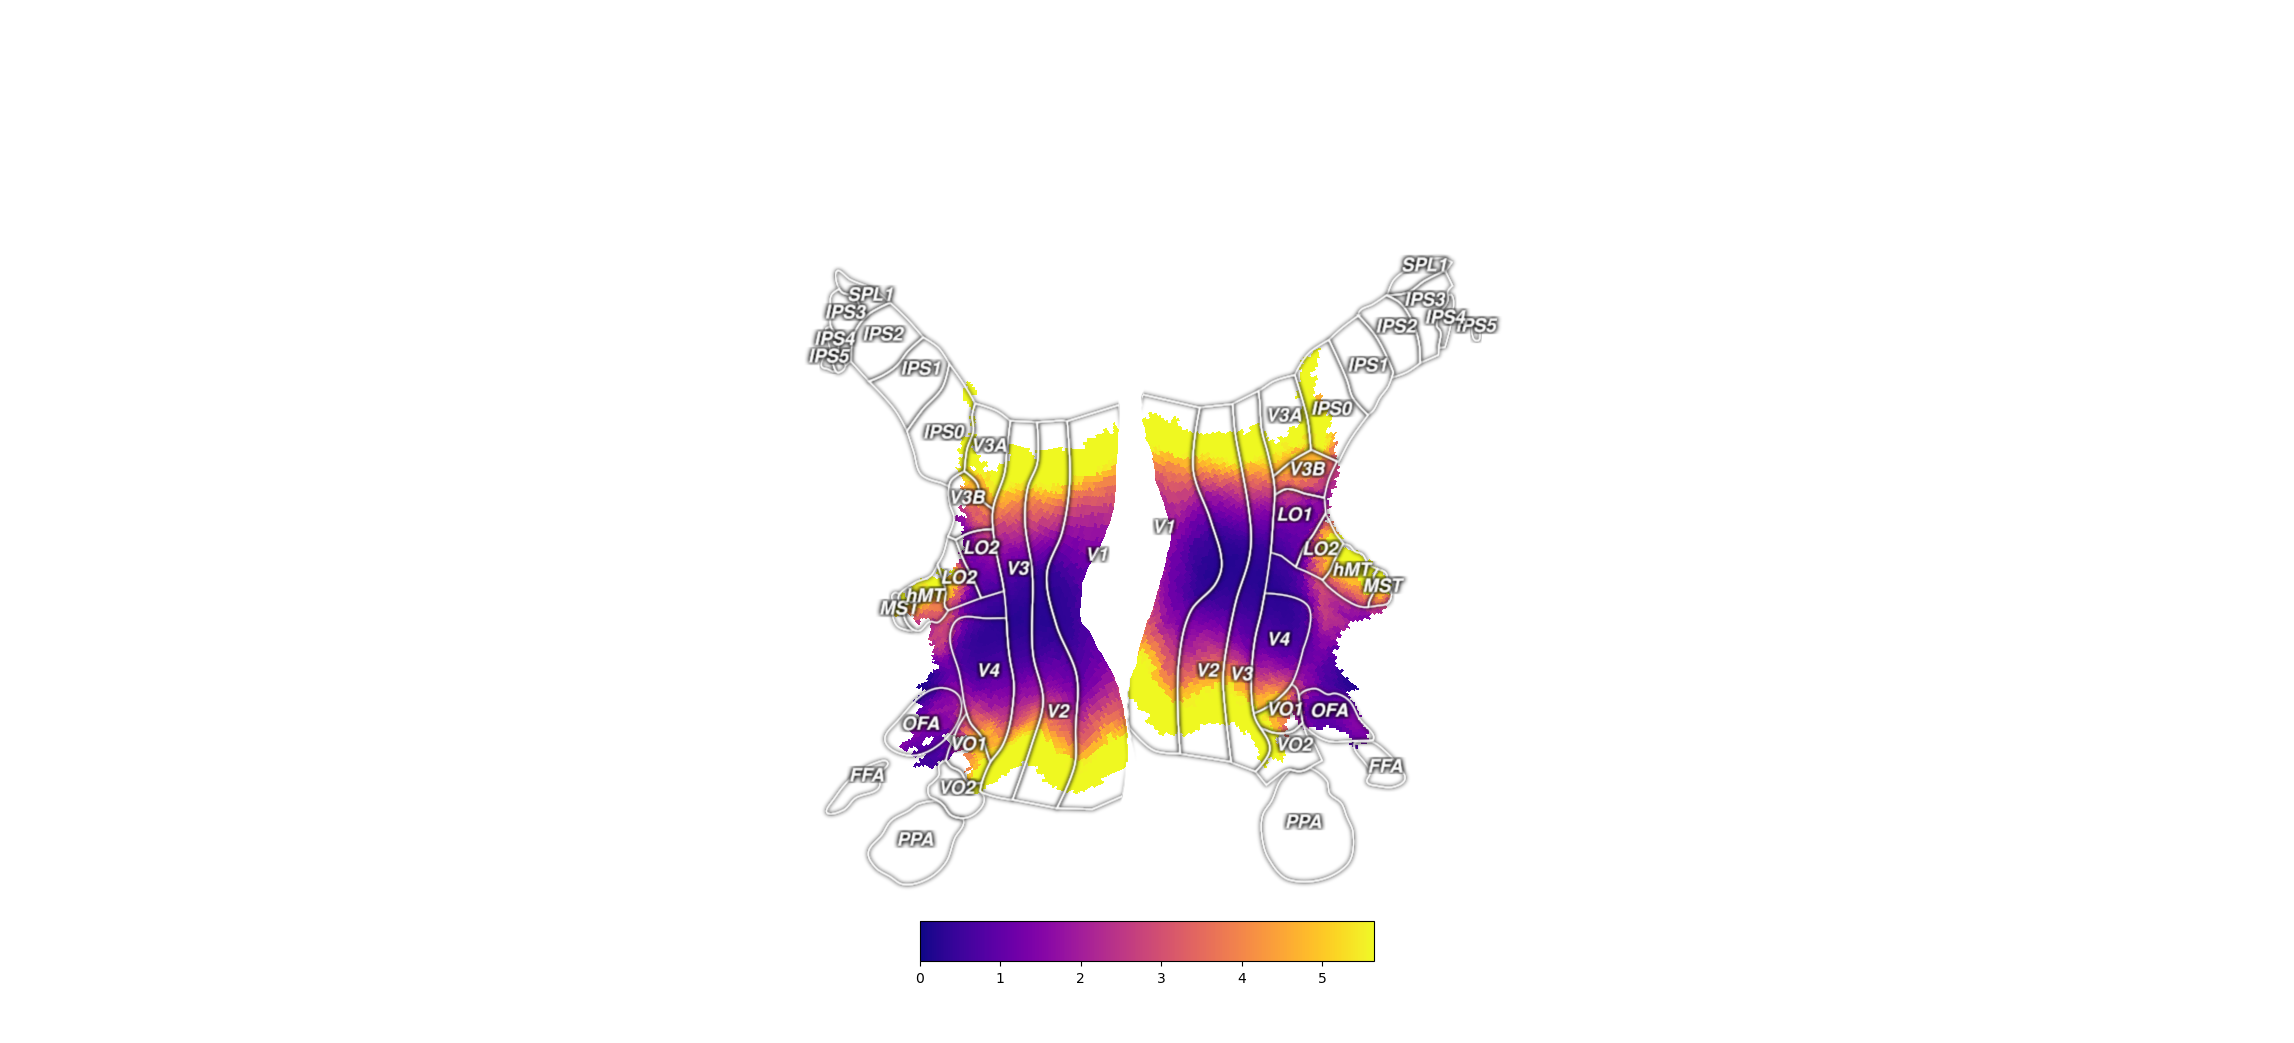

In [8]:
_ecc = ecc.copy()
_ecc[r2 < 60] = np.nan # only show vertices with at least 60% variance explained 
vertex = cortex.Vertex(_ecc, 'fsaverage', cmap = 'plasma')
fig = cortex.quickshow(vertex)
plt.savefig('eccentricity.jpeg', dpi = 500, bbox_inches = 'tight')
plt.show()